### Questão 2

Considere os dados apresentados na tabela abaixo. Obtenha os centroides dos clusters
utilizando uma rede neural competitiva que corresponde ao algoritmo K-means. No
processo de inicialização considere os itens (a) e (b) abaixo.

a-) Considere que a rede possui três neurônio que corresponde a existência de três clusters
nos dados. Inicialize os pesos dos neurônios (centroides) de forma aleatória

b-)Considere que existam três clusters e a inicialização dos centros seja dada por
m1=(0,0,0)t, m2=(1,1,1)t, m3=(-1,0,2)t


In [27]:
# Bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as stl
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import RegularPolygon
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

##a) Considere que a rede possui três neurônio que corresponde a existência de três clusters nos dados. Inicialize os pesos dos neurônios (centroides) de forma aleatória

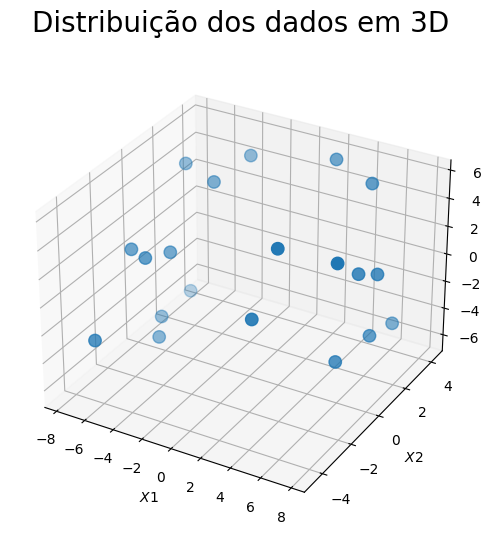

In [33]:
# Definição dos dados do problema, depois serão transformados em um dataframe
x1 = [-5.82, -4.68, 3.36, 7.72, -7.64, -6.87, 4.47, 7.73, -7.71, -5.91, 2.18, 6.72, -5.25, -6.94, 7.09, 6.81, -4.19, -5.38, 5.08, 7.27]
x2 = [-4.58, 2.16, -3.19, 0.88, 3.06, 0.57, -2.62, -2.01, 3.34, -0.49, 3.81, -0.93, -0.26, -1.22, 0.20, 3.17, 4.24, -1.74, 3.30, 0.93]
x3 = [-1.97, 3.71, 1.09, 1.80, 3.50, -5.45, 5.76, 5.18, -6.33, -5.68, 5.82, -3.04, 0.56, 1.13, 2.25, -4.15, 4.04, 1.43, 5.33, -2.78]

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, s=80)
plt.title('Distribuição dos dados em 3D', pad=20, size=20)
ax.set_xlabel('$X1$', fontsize=10)
ax.set_ylabel('$X2$', fontsize=10)
ax.set_zlabel('$X3$', fontsize=10)
plt.show()

In [34]:
kmeans = KMeans(  # inicializando de forma randômica os centróides
         init='random',
         n_clusters=3,
         n_init=10,
         max_iter=100,
         random_state=33
)

kmeans.fit(df) #treino com o conjunto de dados
kmeans.cluster_centers_
kmeans.labels_

array([1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2],
      dtype=int32)

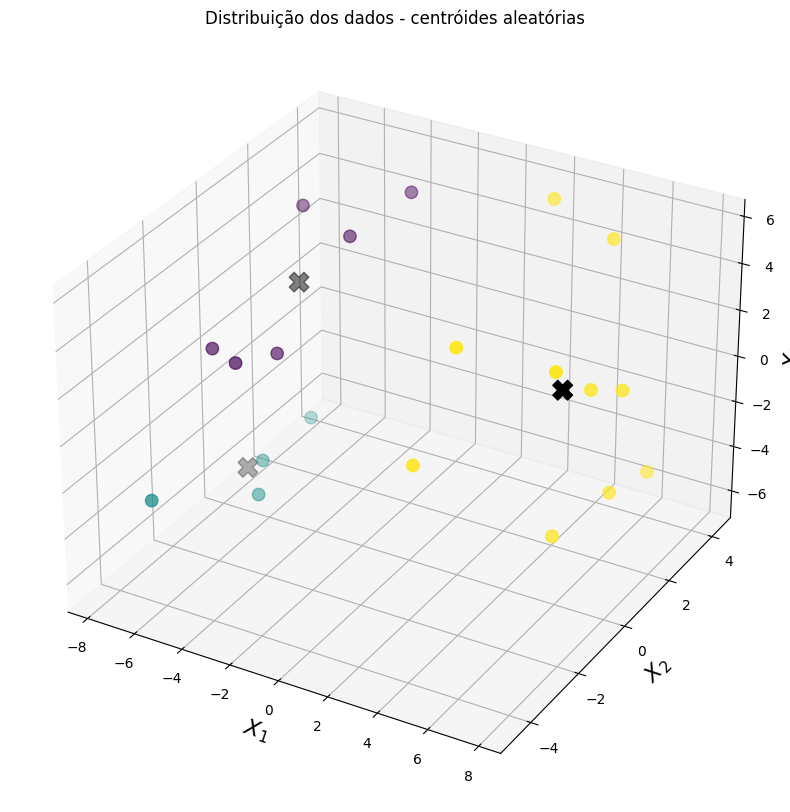

In [35]:
centroides = kmeans.cluster_centers_
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, c=labels, s=80)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', s=200, marker='X')
plt.title('Distribuição dos dados - centróides aleatórias')
ax.set_xlabel('$X_1$', fontsize=16)
ax.set_ylabel('$X_2$', fontsize=16)
ax.set_zlabel('$X_3$', fontsize=16)

plt.show()

##b) Considere que existam três clusters e a inicialização dos centros seja dada por m1=(0,0,0)t, m2=(1,1,1)t, m3=(-1,0,2)t


In [36]:
m1 = [[0],[0],[0]]
m2 = [[1],[1],[1]]
m3 = [[-1],[0],[2]]

valores = np.concatenate((m1, m2, m3), axis=1)

kmeans = KMeans(init=valores, n_clusters=3, random_state=0, max_iter=1000)

kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=array([[ 0,  1, -1],
       [ 0,  1,  0],
       [ 0,  1,  2]]),
       max_iter=1000, n_clusters=3, random_state=0)

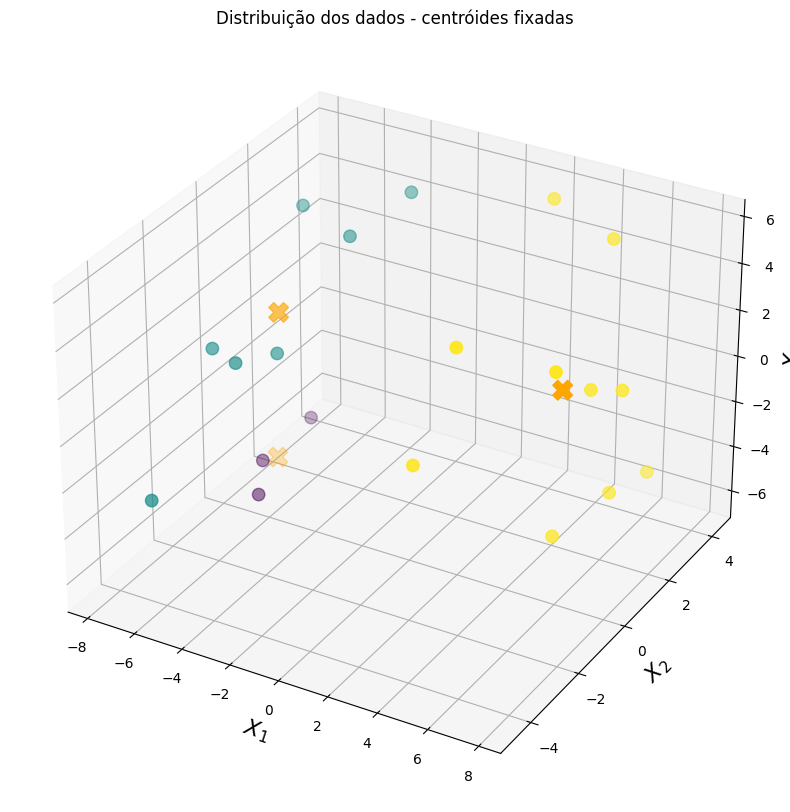

In [37]:
centroides = kmeans.cluster_centers_
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, c=labels, s=80)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='orange', s=200, marker='X')
plt.title('Distribuição dos dados - centróides fixadas')
ax.set_xlabel('$X_1$', fontsize=16)
ax.set_ylabel('$X_2$', fontsize=16)
ax.set_zlabel('$X_3$', fontsize=16)

plt.show()